<img src="Programming%20Tutorials(Title).png" style="height:600px", align="middle">

In [1]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
filename = 'iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename, names=names)

In [4]:
# shape
print(dataset.shape)

(150, 5)


Peek at the Data
It is also always a good idea to actually eyeball your data.

In [5]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width   class
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8         

In [6]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# class distribution
print(dataset.groupby('class').size())

class
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


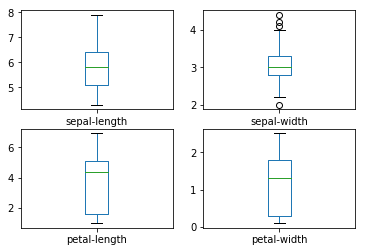

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

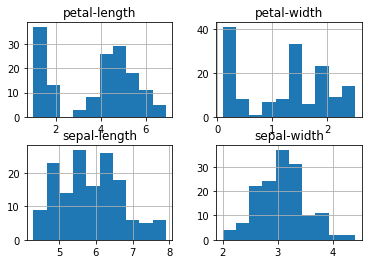

In [9]:
# histograms
dataset.hist()
pyplot.show()

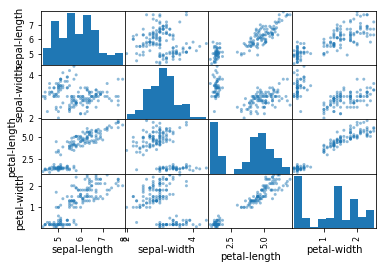

In [10]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [11]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [12]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


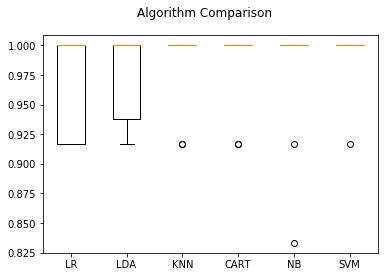

In [13]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [14]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00         7
 Versicolor       0.85      0.92      0.88        12
  Virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30



In [15]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [16]:
# Load dataset
filename = 'housingdata.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=False, names=names)

In [17]:
# shape
print(dataset.shape)

(506, 14)


In [18]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [19]:
# head
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

We can confirm that the scales for the attributes are all over the place because of the differing
units. We may benefit from some transforms later on.

In [20]:
# descriptions
set_option('precision', 1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [21]:
# correlation
set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

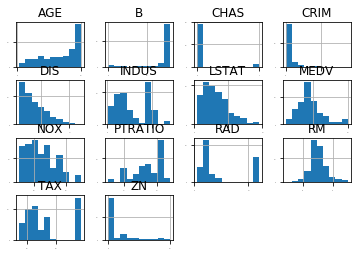

In [22]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

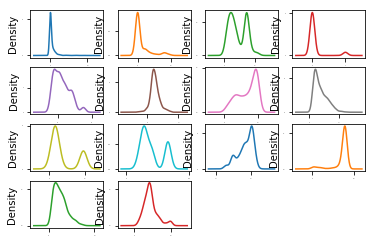

In [23]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,fontsize=1)
pyplot.show()

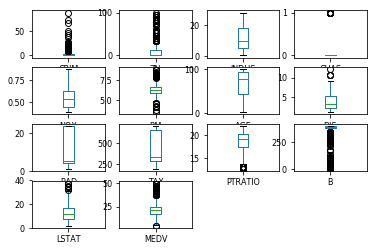

In [24]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

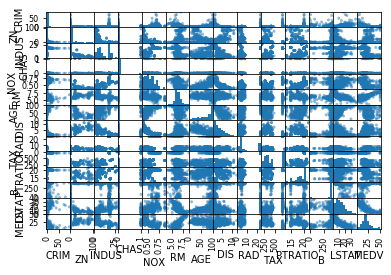

In [25]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

We can see that some of the higher correlated attributes do show good structure in their
relationship. Not linear, but nice predictable curved relationships.

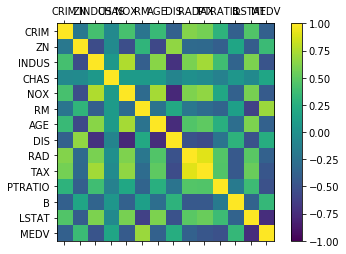

In [26]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [27]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [28]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [29]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [30]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -23.162888 (12.337734)
SVR: -85.518342 (31.994798)


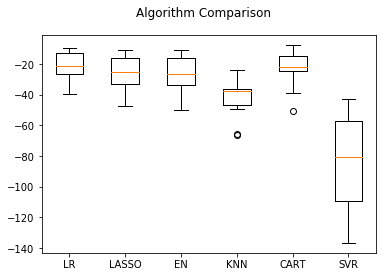

In [31]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [32]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -22.917847 (9.269510)
ScaledSVR: -29.633086 (17.009186)


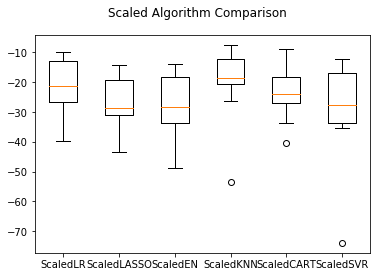

In [33]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [34]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [35]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


In [36]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -14.954003 (6.593934)
ScaledGBM: -10.106367 (4.544423)
ScaledRF: -13.182535 (6.751008)
ScaledET: -10.340156 (5.795315)


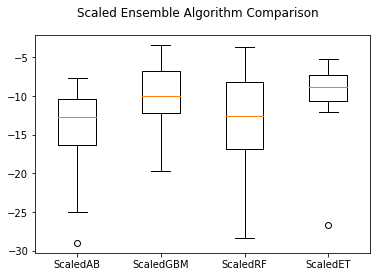

In [37]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [38]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.356471 using {'n_estimators': 400}
-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694096 (4.275762) with: {'n_estimators': 150}
-9.539706 (4.270637) with: {'n_estimators': 200}
-9.448764 (4.262603) with: {'n_estimators': 250}
-9.429946 (4.273791) with: {'n_estimators': 300}
-9.369824 (4.254108) with: {'n_estimators': 350}
-9.356471 (4.267837) with: {'n_estimators': 400}


In [39]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.875252079219903


In [40]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [41]:
# Load dataset
url = 'sonar.all-data.csv'
dataset = read_csv(url, header=None)

In [42]:
# shape
print(dataset.shape)

(208, 61)


In [43]:
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


We can see that all of the attributes are numeric (float) and that the class value has been
read in as an object.

Let’s now take a peek at the first 20 rows of the data.

In [44]:
# head
set_option('display.width', 100)
print(dataset.head(20))

          0         1         2         3     4     5     6         7     8     9  ...        51  \
0   2.00e-02  3.71e-02  4.28e-02  2.07e-02  0.10  0.10  0.15  1.60e-01  0.31  0.21 ...  2.70e-03   
1   4.53e-02  5.23e-02  8.43e-02  6.89e-02  0.12  0.26  0.22  3.48e-01  0.33  0.29 ...  8.40e-03   
2   2.62e-02  5.82e-02  1.10e-01  1.08e-01  0.10  0.23  0.24  3.77e-01  0.56  0.62 ...  2.32e-02   
3   1.00e-02  1.71e-02  6.23e-02  2.05e-02  0.02  0.04  0.11  1.28e-01  0.06  0.13 ...  1.21e-02   
4   7.62e-02  6.66e-02  4.81e-02  3.94e-02  0.06  0.06  0.12  2.47e-01  0.36  0.45 ...  3.10e-03   
5   2.86e-02  4.53e-02  2.77e-02  1.74e-02  0.04  0.10  0.12  1.83e-01  0.21  0.30 ...  4.50e-03   
6   3.17e-02  9.56e-02  1.32e-01  1.41e-01  0.17  0.17  0.07  1.40e-01  0.21  0.35 ...  2.01e-02   
7   5.19e-02  5.48e-02  8.42e-02  3.19e-02  0.12  0.09  0.10  6.13e-02  0.15  0.28 ...  8.10e-03   
8   2.23e-02  3.75e-02  4.84e-02  4.75e-02  0.06  0.06  0.08  9.80e-03  0.07  0.15 ...  1.45e-02   


In [45]:
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())

            0          1        2        3        4        5        6        7        8        9   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062    0.085    0.118    0.134   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107    0.112    0.152    0.182   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

         ...           50         51         52       53         54         55         56 

In [46]:
# class distribution
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


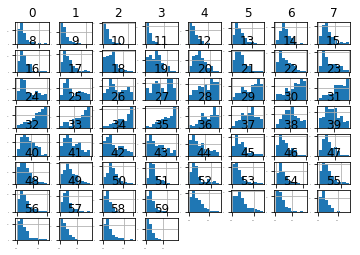

In [47]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

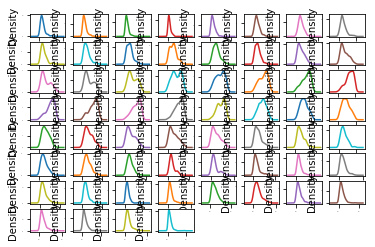

In [48]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
fontsize=1)
pyplot.show()

In [49]:
# box and whisker plots
# dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False,fontsize=1)
# pyplot.show()

We can see that attributes do have quite different spreads. Given the scales are the same, it
may suggest some benefit in standardizing the data for modeling to get all of the means lined
up.

Multimodal Data Visualizations
Let’s visualize the correlations between the attributes.

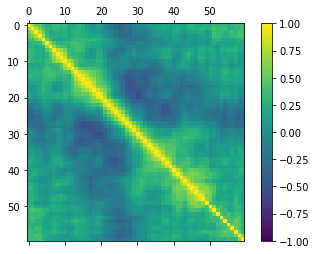

In [50]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [51]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)


In [52]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [53]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [54]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.693015 (0.093764)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


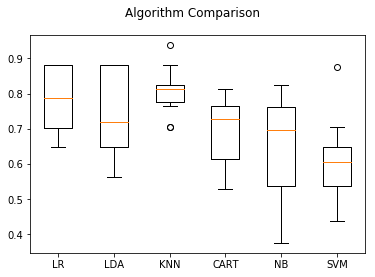

In [55]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [56]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.704412 (0.101383)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


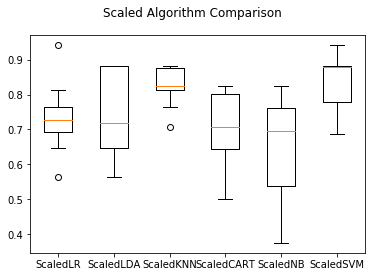

In [57]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [58]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849398 using {'n_neighbors': 1}
0.849398 (0.059881) with: {'n_neighbors': 1}
0.837349 (0.066303) with: {'n_neighbors': 3}
0.837349 (0.037500) with: {'n_neighbors': 5}
0.765060 (0.089510) with: {'n_neighbors': 7}
0.753012 (0.086979) with: {'n_neighbors': 9}
0.734940 (0.104890) with: {'n_neighbors': 11}
0.734940 (0.105836) with: {'n_neighbors': 13}
0.728916 (0.075873) with: {'n_neighbors': 15}
0.710843 (0.078716) with: {'n_neighbors': 17}
0.722892 (0.084555) with: {'n_neighbors': 19}
0.710843 (0.108829) with: {'n_neighbors': 21}


In [59]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.867470 using {'C': 1.5, 'kernel': 'rbf'}
0.759036 (0.098863) with: {'C': 0.1, 'kernel': 'linear'}
0.530120 (0.118780) with: {'C': 0.1, 'kernel': 'poly'}
0.572289 (0.130339) with: {'C': 0.1, 'kernel': 'rbf'}
0.704819 (0.066360) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746988 (0.108913) with: {'C': 0.3, 'kernel': 'linear'}
0.644578 (0.132290) with: {'C': 0.3, 'kernel': 'poly'}
0.765060 (0.092312) with: {'C': 0.3, 'kernel': 'rbf'}
0.734940 (0.054631) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740964 (0.083035) with: {'C': 0.5, 'kernel': 'linear'}
0.680723 (0.098638) with: {'C': 0.5, 'kernel': 'poly'}
0.789157 (0.064316) with: {'C': 0.5, 'kernel': 'rbf'}
0.746988 (0.059265) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746988 (0.084525) with: {'C': 0.7, 'kernel': 'linear'}
0.740964 (0.127960) with: {'C': 0.7, 'kernel': 'poly'}
0.813253 (0.084886) with: {'C': 0.7, 'kernel': 'rbf'}
0.753012 (0.058513) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.759036 (0.096940) with: {'C': 0.9, 'kernel': 'linear'

In [60]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.819853 (0.058293)
GBM: 0.841912 (0.113531)
RF: 0.758088 (0.082566)
ET: 0.854779 (0.096856)


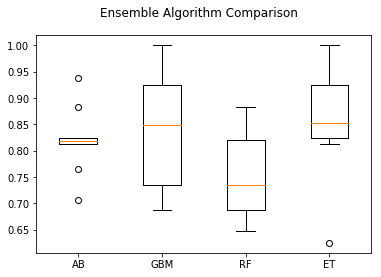

In [61]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [62]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42



<img src="Programming%20Tutorials%20End.png" style="height:600px", align="middle">